# Week 1: Full Stack Machine Learning and Delivering Business Value


___
**Learning goals:** Understand

- the problem space: business, organizational/cultural, and technical concerns
- the dataflow paradigm and DAGs
- the basics of Metaflow
___

## How can ML create business value?

![bv1](../img/biz-value-1.png)

![bv1](../img/biz-value-2.png)

![bv1](../img/biz-value-3.png)

## Who does ML in organizations?

- A _data scientist_ or _machine learning researcher_ develops and prototypes machine learning or other data science models.
- A _machine learning engineer_ implements the model in a scalable, production- ready way.
- A _data engineer_ sets up data pipelines for input and output data, including data transformations.
- A _DevOps engineer_ deploys applications in production and makes sure that all the systems stay up and running flawlessly.
- An _application engineer_ integrates the model with other business components, such as web applications, which are the consumers of the model.
- An _infrastructure_ or _platform engineer_ provides general pieces of infrastructure, such as data warehouses or compute platforms, for many applications to use.

In addition to this technical team, the data science project may have involvement from _business owners_, who understand the business context of the application; _product managers_, who map the business context to technical requirements; and _project/program managers_ who help to coordinate cross-functional collaboration.

## The Modern Data Stack for Production ML

There are many layers to the modern ML stack. Consider a not atypical process of a data scientist moving their models from prototype to production:

- You'll commonly use notebooks and .csv's for prototype → when moving to prod, you may need integrate with data warehouse or directly pull data from s3 every time you execute a model; or train on streaming data;
- Then perhaps you'll need to store your model and artifacts in a data warehouse/lake and possibly so every time you run it;
– In this case, we see the data/storage concern interacting with the model versioning question;
- Then perhaps your data volume grows → you need a larger instance so we burst to the cloud; what happens to libraries? How do you migrate your state?
- Then let’s say you need to train on GPUs but not for data processing: GPUs are expensive so we want to be able to send the training task there but not the rest → (data) workflows are a useful abstraction here.
- and much more...


So what does the modern stack look like? The following is from [Effective Data Science Infrastructure](https://www.manning.com/books/effective-data-science-infrastructure), published by Manning.

![flow0](../img/modern-ML-stack.jpg)

Although they are all incredibly important, data scientists should NOT be expected to be experts at all of them:

![flow0](../img/data-triangle.jpg)

Let's have a look at some of what data scientists do to interact with the infrastructural layers:

![flow0](../img/ds-workflow.jpg)

And let's not forget that this is an iterative process!

![flow0](../img/data-science-iteration.jpg)

## The dataflow paradigm and DAGs: Orchestrating your machine learning workflows

The complexity of ML workflows can be become complicated very quickly. To avoid a jungle of data pipelines and models, we need organizational principles for our workflows and _directed acyclic graphs_ have become a standard for this:

<img src="../img/flow_ex_0.png" alt="DAG" style="width: 400px;"/>

DAGs can often be more complicated:

![flow0](../img/flow_ex_1.png)

### A Word on the Basics of Metaflow

> Metaflow follows the dataflow paradigm which models a program as a directed graph of operations. This is a natural paradigm for expressing data processing pipelines, machine learning in particular. We call the graph of operations a flow. You define the operations, called steps, which are nodes of the graph and contain transitions to the next steps, which serve as edges.

> Metaflow sets some constraints on the structure of the graph. For starters, every flow needs a step called start and a step called end. An execution of the flow, which we call a run, starts at start. The run is successful if the final end step finishes successfully. What happens between start and end is up to you.

-- The [Metaflow docs](https://docs.metaflow.org/metaflow/basics).

## The Basics of Metaflow: Crafting Metaflows for Machine Learning!

ML flows can be broken down into steps, such as:

- importing data
- processing, wrangling, and/or transforming the data
- data validation
- model configuration
- model training, and
- model deployment.

The first flow we write will be a template showing these steps.

As stated above, in the spirit of not introducing more tools, we'll write our flows in notebook cells and we'll execute them using the command line in Jupyter Lab. Having said that, we encourage everybody to get comfortable writing Python scripts and using the command line as much as possible! Notebooks are wonderful for many things but not necessarily for writing and executing ML workflows.


At the end of the day, modern data science applications are real software projects. Applying software engineering principles like structuring code as functions and modules is useful and hence as you get up to speed, you might find a modern IDE like Visual Studio Code quite convenient in writing your workflows. Don’t worry, it is still the same code running in flows as what you would write in notebooks, so there’s not much new to learn.

In [1]:
%%writefile ../flows/local/flow_template.py

"""

Template for writing Metaflows

"""

from metaflow import FlowSpec, step, current, card


class Template_Flow(FlowSpec):
    """
    Template for Metaflows.
    You can choose which steps suit your workflow.
    We have included the following common steps:
    - Start
    - Process data
    - Data validation
    - Model configuration
    - Model training
    - Model deployment
    """
    @card
    @step
    def start(self):
        """
        Start Step for a Flow;
        """
        print("flow name: %s" % current.flow_name)
        print("run id: %s" % current.run_id)
        print("username: %s" % current.username)

        # Call next step in DAG with self.next(...)
        self.next(self.process_raw_data)

    @step
    def process_raw_data(self):
        """
        Read and process data
        """
        print("In this step, you'll read in and process your data")

        self.next(self.data_validation)

    @step
    def data_validation(self):
        """
        Perform data validation
        """
        print("In this step, you'll write your data validation code")

        self.next(self.get_model_config)

    @step
    def get_model_config(self):
        """
        Configure model + hyperparams
        """
        print("In this step, you'll configure your model + hyperparameters")
        self.next(self.train_model)

    @step
    def train_model(self):
        """
        Train your model
        """
        print("In this step, you'll train your model")

        self.next(self.deploy)

    @step
    def deploy(self):
        """
        Deploy model
        """
        print("In this step, you'll deploy your model")

        self.next(self.end)

    @step
    def end(self):
        """
        DAG is done! Congrats!
        """
        print('DAG ended! Woohoo!')


if __name__ == '__main__':
    Template_Flow()


Overwriting ../flows/local/flow_template.py


You can now run this flow by executing the following from the CLI:

We can also (cheekily) execute from this NB using the handy iPython magic shBang (!):

In [2]:
! python ../flows/local/flow_template.py run

Metaflow 2.7.21.4 executing Template_Flow for user:sandbox
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2023-05-01 02:44:02.485 Workflow starting (run-id 2), see it in the UI at https://ui-pw-789711110.outerbounds.dev/Template_Flow/2
2023-05-01 02:44:02.698 [2/start/10 (pid 1441)] Task is starting.
2023-05-01 02:44:04.372 [2/start/10 (pid 1441)] flow name: Template_Flow
2023-05-01 02:44:07.311 [2/start/10 (pid 1441)] run id: 2
2023-05-01 02:44:07.311 [2/start/10 (pid 1441)] username: sandbox
2023-05-01 02:44:07.541 [2/start/10 (pid 1441)] Task finished successfully.
2023-05-01 02:44:07.893 [2/process_raw_data/11 (pid 1540)] Task is starting.
2023-05-01 02:44:09.514 [2/process_raw_data/11 (pid 1540)] In this step, you'll read in and process your data
2023-05-01 02:44:10.366 [2/process_raw_data/11 (pid 1540)] Task finished successfully.
2023-05-01 02:44:10.688 [2/data_validation/12 (pid 1597)] Task is starting.
2023-05-01 02:44:12.178 [2/data_v

Success! But what are all these outputs? I'm glad that you asked!

![flow0](../img/mf_output.png)

- **Timestamp** denotes when the line was output.
- The information inside the square brackets identifies a **task**.
- Every Metaflow run gets a unique ID, a **run ID**.
- A run executes the steps in order. The step that is currently being executed is denoted by **step name**.
- A step may spawn multiple tasks which are identified by a **task ID**.
- The combination of a flow name, run ID, step name, and a task ID,uniquely identify a task in your Metaflow environment, amongst all runs of any flows. Here, the flow name is omitted since it is the same for all lines. We call this globally unique identifier a **pathspec**.
- Each task is executed by a separate process in your operating system, identified by a **process ID** aka _pid_. You can use any operating system level monitoring tools such as top to monitor resource consumption of a task based on its process ID.
- After the square bracket comes a **log message** that may be a message output by Metaflow itself, like “Task is starting” in this example, or a line output by your code.

### Metaflow cards

We can use MF cards to visualize aspects of our flow. In this case, there's not much to check out but we **can** see the DAG by using the CLI as follows:

```
python flows/local/flow_template.py card view start
```

## Write your first data science flow

### EDA on dataset etc....

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv('../data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


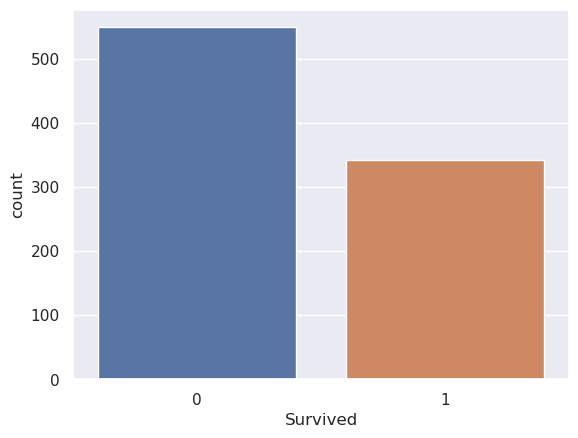

In [6]:
sns.countplot(x='Survived', data=df);



### Build baseline model: majority class classifier

In [7]:
from sklearn.metrics import accuracy_score
df['model_1'] = 0
accuracy_score(df['Survived'], df['model_1'])

0.6161616161616161

### Write the flow, yo!

In [8]:
%%writefile ../flows/local/titanic_flow_1.py

from metaflow import FlowSpec, step, card


class TFlow1(FlowSpec):
    """
    train a boosted tree
    """
    @card
    @step
    def start(self):
        """
        Load the data & train model
        """
        import pandas as pd
        self.df = pd.read_csv('../data/titanic.csv')
        self.next(self.predict)
        
    @step
    def predict(self):
        """
        make predictions
        """
        import pandas as pd
        from sklearn.metrics import accuracy_score
        self.df['model_1'] = 0
        self.score1 = accuracy_score(self.df['Survived'], self.df['model_1'])


        self.next(self.end)
        
        
    @step
    def end(self):
        """
        End of flow!
        """
        print('Score = %s' % self.score1)


if __name__ == "__main__":
    TFlow1()

Overwriting ../flows/local/titanic_flow_1.py


In [9]:
! python ../flows/local/titanic_flow_1.py run

Metaflow 2.7.21.4 executing TFlow1 for user:sandbox
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
2023-05-01 02:44:35.894 Workflow starting (run-id 3), see it in the UI at https://ui-pw-789711110.outerbounds.dev/TFlow1/3
2023-05-01 02:44:36.133 [3/start/18 (pid 1984)] Task is starting.
2023-05-01 02:44:41.882 [3/start/18 (pid 1984)] Task finished successfully.
2023-05-01 02:44:42.163 [3/predict/19 (pid 2089)] Task is starting.
2023-05-01 02:44:45.725 [3/predict/19 (pid 2089)] Task finished successfully.
2023-05-01 02:44:46.030 [3/end/20 (pid 2154)] Task is starting.
2023-05-01 02:44:47.569 [3/end/20 (pid 2154)] Score = 0.6161616161616161
2023-05-01 02:44:48.552 [3/end/20 (pid 2154)] Task finished successfully.
2023-05-01 02:44:48.704 Done! See the run in the UI at https://ui-pw-789711110.outerbounds.dev/TFlow1/3


## A Reminder on Why We're Doing This

As there is significant overhead in doing this work, let's be explicit as to the benifits:
- Notebooks are great when you want to tell a concise linear narrative as a single article. That’s why they are so great for teaching and learning. However, real-world applications tend to be non-linear, so it is better to structure the project as an explicit DAG which makes it more understandable for humans and more easily executable by computers.
- A superpower of DAGs is that if you have parallel branches in your DAG, computer can execute them in parallel automatically, making your project finish much faster without you having to change much anything.
- This means that you can e.g. train 200 models - one for each country of the world in parallel, even using multiple computers - which would be impossible to do in a notebook.
- It is much easier to take a workflow, which is a proper Python project, to production than a notebook, in particular when using a project like Metaflow that integrates with modern workflow schedulers and compute platforms like Kubernetes. This will make engineers happy.

## MORE MATERIAL: Time to Write a Metaflow Flow -- Orchestrating Random Forests

In this section, we'll turn the following random forest into a flow:



```
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

clf_rf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores_rf = cross_val_score(clf_rf, X, y, cv=5)
print(scores_rf)
```

In order to turn this into a (Metaflow) flow, you first need to decide what your steps are going to be. In this case, we’ll have distinct steps to 

* Load the data
* Instantiate the model
* Train the model and perform cross-validation

In general, this involves some design choices on the user’s part and we have some general rules of thumb [here](https://docs.metaflow.org/metaflow/basics).





To then write your flow, you

* Import `FlowSpec` and `step` outside your flow
* Include step-specific imports within each step
* Assign any data structures you wish to pass between steps to self





In [10]:
%%writefile ../flows/local/rf_flow.py

from metaflow import FlowSpec, step, card

class RF_Flow(FlowSpec):
    """
    train a random forest
    """
    @card 
    @step
    def start(self):
        """
        Load the data
        """
        #Import scikit-learn dataset library
        from sklearn import datasets

        #Load dataset
        self.iris = datasets.load_iris()
        self.X = self.iris['data']
        self.y = self.iris['target']
        self.next(self.rf_model)
        

    @step
    def rf_model(self):
        """
        build random forest model
        """
        from sklearn.ensemble import RandomForestClassifier
        
        self.clf = RandomForestClassifier(n_estimators=10, max_depth=None,
            min_samples_split=2, random_state=0)
        self.next(self.train)

        
        
    @step
    def train(self):
        """
        Train the model
        """
        from sklearn.model_selection import cross_val_score
        self.scores = cross_val_score(self.clf, self.X, self.y, cv=5)
        self.next(self.end)
        
        
    @step
    def end(self):
        """
        End of flow!
        """
        print("RF_Flow is all done.")


if __name__ == "__main__":
    RF_Flow()

Overwriting ../flows/local/rf_flow.py


Execute the above from the command line with

```bash
python flows/local/rf_flow.py run
```

We can check out the Metaflow card:

```
python flows/local/rf_flow.py card view start
```

## Boosted Trees Flow

In this section, we'll turn the an XGBoost example into a flow:

In [11]:
%%writefile ../flows/local/boosted_flow.py

from metaflow import FlowSpec, step, card


class BSTFlow(FlowSpec):
    """
    train a boosted tree
    """
    @card
    @step
    def start(self):
        """
        Load the data & train model
        """
        import xgboost as xgb
        dtrain = xgb.DMatrix('data/agaricus.txt.train')
        param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic','eval_metric':'logloss'}
        num_round = 2
        bst = xgb.train(param, dtrain, num_round)
        bst.save_model("model.json")
        self.next(self.predict)
        
    @step
    def predict(self):
        """
        make predictions
        """
        import xgboost as xgb

        dtest = xgb.DMatrix('data/agaricus.txt.test')
        # make prediction
        bst = xgb.Booster()
        bst.load_model("model.json")
        preds = bst.predict(dtest)
        self.next(self.end)
        
        
    @step
    def end(self):
        """
        End of flow!
        """
        print("BSTFlow is all done.")


if __name__ == "__main__":
    BSTFlow()

Overwriting ../flows/local/boosted_flow.py


Execute the above from the command line with

```bash
python flows/local/boosted_flow.py run
```

## Your First Deep Learning Metaflow!

In this section, you'll turn a deep learning example above into a flow.

**HANDS-ON:** Complete the following flow so that it builds a Keras neural network.

In [12]:
%%writefile ../flows/local/NN_flow_student.py

from metaflow import FlowSpec, step, Parameter, JSONType, IncludeFile, card
from taxi_modules import init, MODELS, MODEL_LIBRARIES
import json


class NNFlow(FlowSpec):
    """
    train a NN
    """
    @card
    @step
    def start(self):
        """
        Load the data
        """
        from tensorflow import keras

        # the data, split between train and test sets
        (self.x_train, self.y_train), (self.x_test, self.y_test) = keras.datasets.mnist.load_data()
        self.next(self.wrangle)
        
    @step
    def wrangle(self):
        """
        massage data
        """
        import numpy as np
        from tensorflow import keras
        # Model / data parameters
        self.num_classes = 10
        self.input_shape = (28, 28, 1)

        # Scale images to the [0, 1] range
        self.x_train = self.x_train.astype("float32") / 255
        self.x_test = self.x_test.astype("float32") / 255
        # Make sure images have shape (28, 28, 1)
        self.x_train = np.expand_dims(self.x_train, -1)
        self.x_test = np.expand_dims(self.x_test, -1)

        # convert class vectors to binary class matrices
        self.y_train = keras.utils.to_categorical(self.y_train, self.num_classes)
        self.y_test = keras.utils.to_categorical(self.y_test, self.num_classes)
        
        self.next(self.build_model)


    @step
    def build_model(self):
        """
        build NN model
        """
        import tempfile
        import numpy as np
        import tensorflow as tf
        from tensorflow import keras
        from tensorflow.keras import layers

        model = keras.Sequential(
            [
                keras.Input(shape=self.input_shape),
                layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
                layers.MaxPooling2D(pool_size=(2, 2)),
                layers.Flatten(),
                layers.Dropout(0.5),
                layers.Dense(self.num_classes, activation="softmax"),
            ]
        )
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        with tempfile.NamedTemporaryFile() as f:
            tf.keras.models.save_model(model, f.name, save_format='h5')
            self.model = f.read()
        self.next(self.train)

        
        
    @step
    def train(self):
        """
        Train the model
        """
        import tempfile
        import tensorflow as tf
        self.batch_size = 128
        self.epochs = 15
        
        with tempfile.NamedTemporaryFile() as f:
            f.write(self.model)
            f.flush()
            model =  tf.keras.models.load_model(f.name)
        model.fit(self.x_train, self.y_train, batch_size=self.batch_size, epochs=self.epochs, validation_split=0.1)
        
        self.next(self.end)
        
        
    @step
    def end(self):
        """
        End of flow!
        """
        print("NNFlow is all done.")


if __name__ == "__main__":
    NNFlow()

Overwriting ../flows/local/NN_flow_student.py


## **TODO: replace this with card viewer instructions**

Execute the above from the command line with

```bash
python flows/local/NN_flow_student.py run
```

We can also view the Metaflow card:

```
python flows/local/NN_flow_student.py card view start
```

## Lesson Recap

[TBD]